In [1]:
import os
import json
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
sns.set_style("ticks")
sns.set_context("paper")

In [3]:
# MODES = ["normal", "visual"]
MODES = ["visual"]

In [4]:
TASK_NAMES = (
    "close_drawer",
    "lift_blue_block_drawer",
    "lift_blue_block_slider",
    "lift_blue_block_table",
    "lift_pink_block_drawer",
    "lift_pink_block_slider",
    "lift_pink_block_table",
    "lift_red_block_drawer",
    "lift_red_block_slider",
    "lift_red_block_table",
    "move_slider_left",
    "move_slider_right",
    "open_drawer",
    "place_in_drawer",
    "place_in_slider",
    "push_blue_block_left",
    "push_blue_block_right",
    "push_into_drawer",
    "push_pink_block_left",
    "push_pink_block_right",
    "push_red_block_left",
    "push_red_block_right",
    "rotate_blue_block_left",
    "rotate_blue_block_right",
    "rotate_pink_block_left",
    "rotate_pink_block_right",
    "rotate_red_block_left",
    "rotate_red_block_right",
    "stack_block",
    "turn_off_led",
    "turn_off_lightbulb",
    "turn_on_led",
    "turn_on_lightbulb",
    "unstack_block",
)

## Loading Results

In [5]:
norm_save_dir = "../outputs/calvin/gcbc_cclipt/last/sug_starts"
rand_save_dir = "../outputs/calvin/gcbc_cclipt_random/last/sug_starts"

In [6]:
def parse_results(save_dir):
    result_keys = ["results", "evaluated_idxs"]
    results_dict = {
        "normal": {k: None for k in result_keys},
        "visual": {k: None for k in result_keys},
    }

    results_dict["normal"]["save_dir"] = os.path.join(save_dir, "normal")
    results_dict["visual"]["save_dir"] = os.path.join(save_dir, "visual")

    for mode in MODES:
        for key in result_keys:
            results_dict[mode][key] = {}
            for task in TASK_NAMES:
                file_path = os.path.join(
                    results_dict[mode]["save_dir"], task, f"{key}.npz"
                )
                results_dict[mode][key][task] = dict(np.load(file_path))["arr_0"]

    return results_dict

In [7]:
norm_results_dict = parse_results(norm_save_dir)
rand_results_dict = parse_results(rand_save_dir)

In [8]:
results_dict = {
    "normal": norm_results_dict["visual"],
    "random": rand_results_dict["visual"],
}
MODES = list(results_dict.keys())

In [9]:
tasks = list(results_dict["random"]["results"].keys())
n_tasks = len(tasks)

## Success Rate

In [10]:
for mode in MODES:
    results = results_dict[mode]["results"]
    success_rates = {k: v.sum() / v.size for k, v in results.items()}
    total_sr = sum([v.sum() for v in results.values()]) / sum(
        [len(v) for v in results.values()]
    )
    results_dict[mode]["success_rates"] = success_rates
    results_dict[mode]["total_sr"] = total_sr

### Main

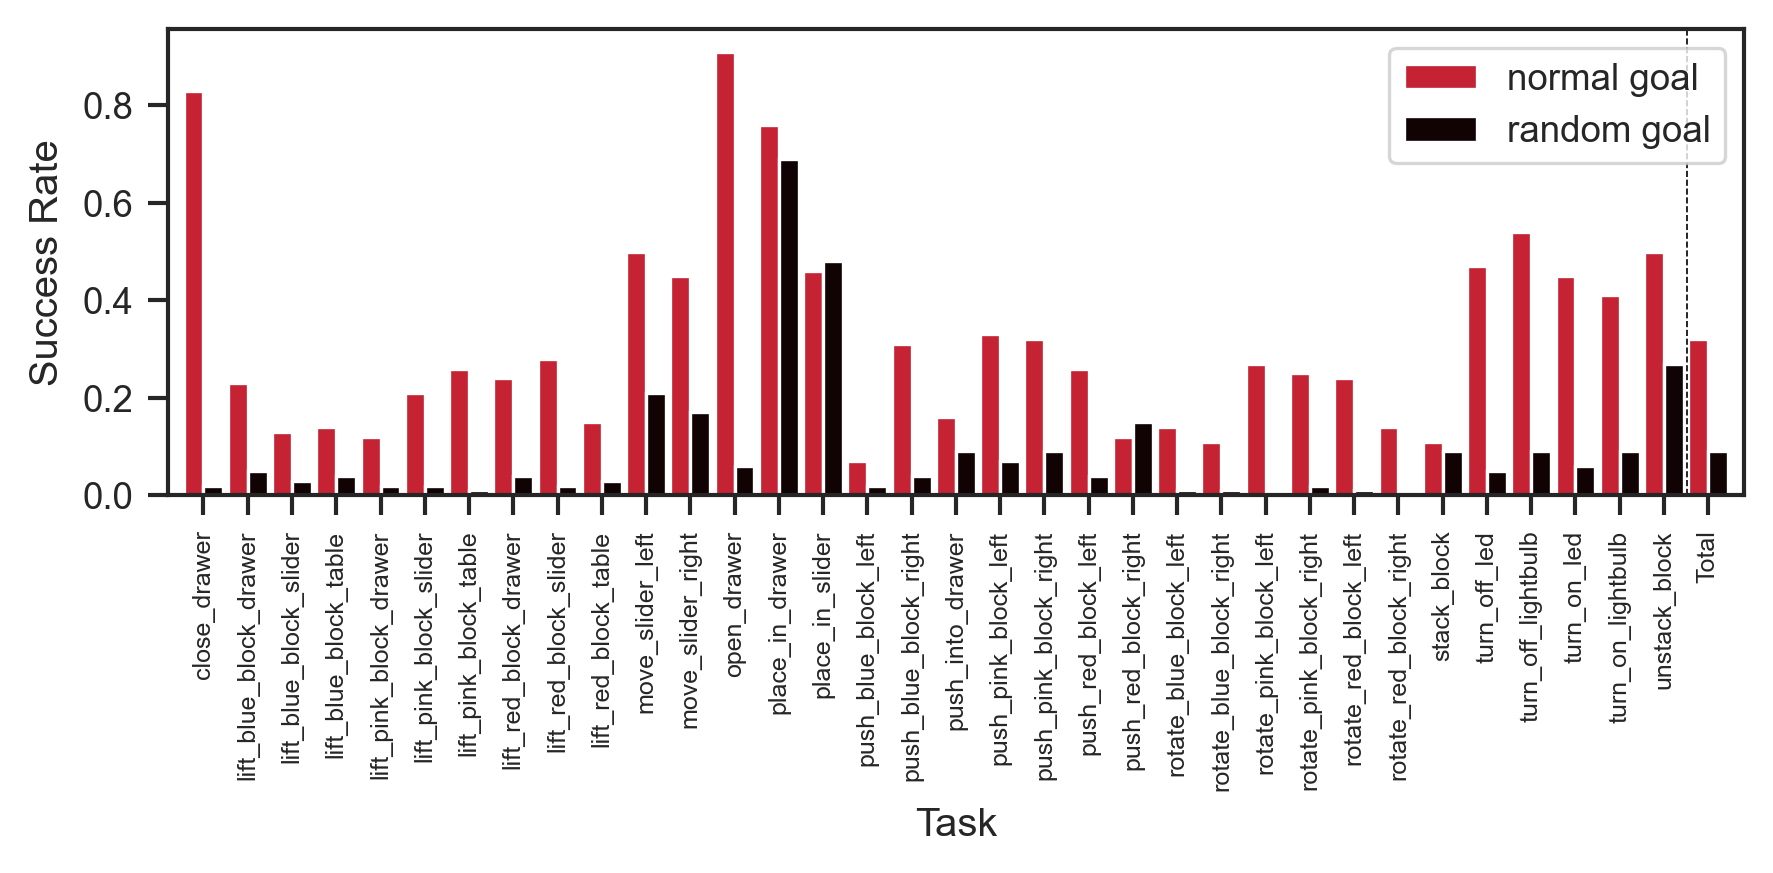

In [11]:
f, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

# Position of bars on x-axis (+1 cuz we also plot the total SR
ind = np.arange(n_tasks + 1)
# Width of a bar
width = 0.45

normal_sr = [results_dict["normal"]["success_rates"][task] for task in tasks]
normal_total_sr = results_dict["normal"]["total_sr"]

random_sr = [results_dict["random"]["success_rates"][task] for task in tasks]
random_total_sr = results_dict["random"]["total_sr"]

ax.bar(x=ind[:-1], height=normal_sr, width=width, color="#C52233", label="normal goal")
ax.bar(
    x=ind[:-1] + width,
    height=random_sr,
    width=width,
    color="#110304",
    label="random goal",
)

ax.bar(x=ind[-1], height=normal_total_sr, width=width, color="#C52233")
ax.bar(x=ind[-1] + width, height=random_total_sr, width=width, color="#110304")

ax.axvline(x=len(tasks) - 0.25, color="black", linestyle="dashed", linewidth=0.4)

ax.set_xticks(ind + width / 2, tasks + ["Total"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)

ax.set_ylabel("Success Rate")
ax.set_xlabel("Task")

ax.margins(x=0.01)
ax.legend()

f.set_tight_layout(True)
plt.show()

In [12]:
sr_df = pd.DataFrame.from_records(
    [results_dict[mode]["success_rates"] for mode in MODES],
    index=["Normal Success Rate", "Random Success Rate"],
)
sr_stats = sr_df.T.describe()
sr_df["Total"] = [normal_total_sr, random_total_sr]

In [13]:
sr_df

,close_drawer,lift_blue_block_drawer,lift_blue_block_slider,lift_blue_block_table,lift_pink_block_drawer,lift_pink_block_slider,lift_pink_block_table,lift_red_block_drawer,lift_red_block_slider,lift_red_block_table,...,rotate_pink_block_right,rotate_red_block_left,rotate_red_block_right,stack_block,turn_off_led,turn_off_lightbulb,turn_on_led,turn_on_lightbulb,unstack_block,Total
Normal Success Rate,0.83,0.23,0.13,0.14,0.12,0.21,0.26,0.24,0.28,0.15,...,0.25,0.24,0.14,0.11,0.47,0.54,0.45,0.41,0.50,0.319706
Random Success Rate,0.02,0.05,0.03,0.04,0.02,0.02,0.01,0.04,0.02,0.03,...,0.02,0.01,0.00,0.09,0.05,0.09,0.06,0.09,0.27,0.090882


In [14]:
sr_stats

,Normal Success Rate,Random Success Rate
count,34.000000,34.000000
mean,0.319706,0.090882
std,0.210835,0.141708
min,0.070000,0.000000
25%,0.142500,0.020000
50%,0.260000,0.040000
75%,0.450000,0.090000
max,0.910000,0.690000
